In [6]:
import pandas as pd
from pytrends import dailydata
import datetime


#%% Define scraping functions
def get_google_trends_data(keyword, from_date, to_date, geo):
    
    """
    Gets daily Google Trends for keyword.
    Dates like: 'YYYY-MM-DD'
    """
    
    from_year, from_month = datetime.date.fromisoformat(from_date).year, datetime.date.fromisoformat(from_date).month
    to_year, to_month = datetime.date.fromisoformat(to_date).year, datetime.date.fromisoformat(to_date).month

    data = dailydata.get_daily_data(keyword, from_year, from_month, to_year, to_month, geo=geo)
    
    return data[keyword]

In [8]:
google = get_google_trends_data('Bitcoin', '2013-10-01', '2013-12-15', geo="US")


Bitcoin:2013-10-01 2013-10-31
Bitcoin:2013-11-01 2013-11-30
Bitcoin:2013-12-01 2013-12-31


c:\Users\Zbook Create G7\Desktop\api_forecast\venv\lib\site-packages\pytrends\dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values


In [9]:
google

date
2013-10-01     1.02
2013-10-02    10.07
2013-10-03    28.80
2013-10-04     9.18
2013-10-05     4.81
              ...  
2013-12-27    10.85
2013-12-28    10.85
2013-12-29     6.75
2013-12-30     8.10
2013-12-31     7.54
Name: Bitcoin, Length: 92, dtype: float64

In [16]:
from pytrends.request import TrendReq

In [17]:
TERMS = ["Lundi"]
FORECAST_WEEKS = 52


In [58]:
df  

,python,isPartial
date,,
2004-01-01,33,False
2005-01-01,33,False
2006-01-01,30,False
2007-01-01,27,False
2008-01-01,26,False
2009-01-01,26,False
2010-01-01,24,False
2011-01-01,26,False
2012-01-01,26,False


<Axes: xlabel='date'>

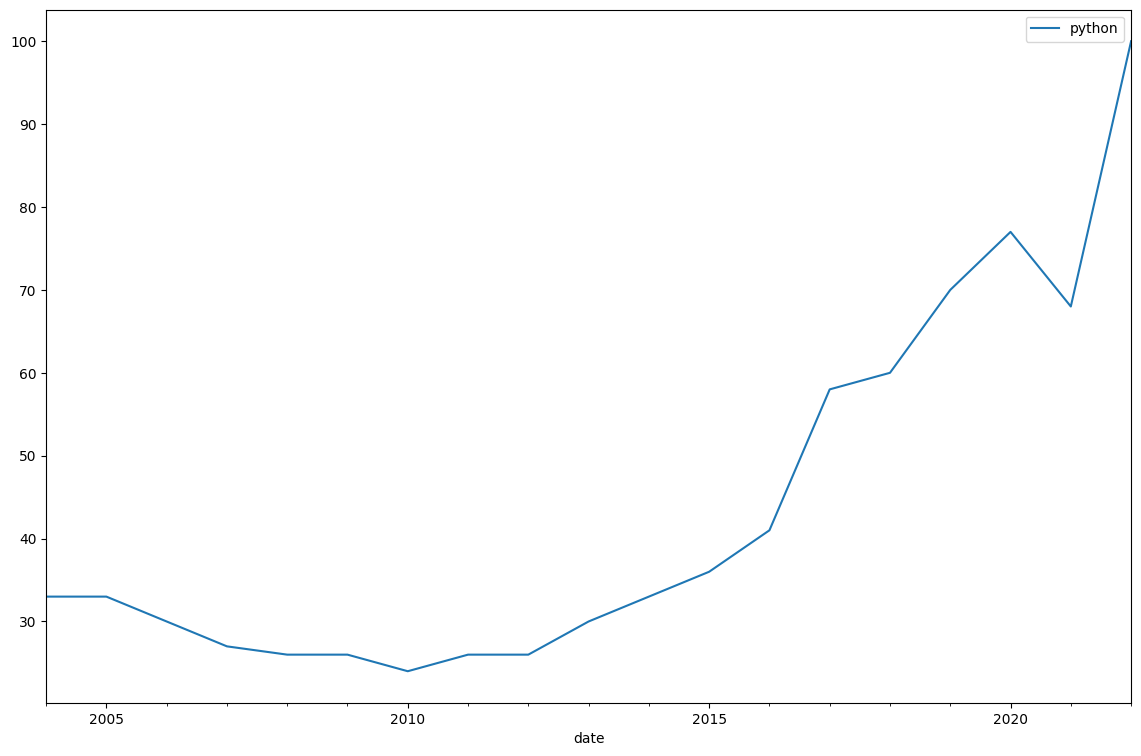

In [57]:
TERMS = ["python"]
pt = TrendReq(hl='fr-FR')
pt.build_payload(TERMS,  timeframe=['1999-09-04 2022-09-10']) 
df = pt.interest_over_time()
df.plot(figsize=(14,9))


In [28]:
df

,python,isPartial
date,,
2019-02-24,57,False
2019-03-03,61,False
2019-03-10,56,False
2019-03-17,60,False
2019-03-24,58,False
...,...,...
2024-01-14,69,False
2024-01-21,77,False
2024-01-28,81,False


In [43]:
from utils import read_data
from data_ingestion import connect_db, ingest_data_for_keywords
import pandas as pd
import datetime

In [45]:
keywords = ['python']
today = datetime.date.today()
three_months_ago = today - datetime.timedelta(days=180)
from_date = three_months_ago.strftime('%Y-%m-%d')
to_date = today.strftime('%Y-%m-%d')
ingest_data_for_keywords(keywords, from_date, to_date)


            python  isPartial
date                         
2023-08-22      82      False
2023-08-23      88      False
2023-08-24      83      False
2023-08-25      74      False
2023-08-26      52      False
...            ...        ...
2024-02-10      51      False
2024-02-11      57      False
2024-02-12      76      False
2024-02-13      92      False
2024-02-14      91      False

[177 rows x 2 columns]


In [39]:
from_date = pd.to_datetime("2000-01-01")
to_date = pd.to_datetime("today")
keywords = 'python'
DATABASE_FILE = 'google_trends_data.db'

engine = connect_db(DATABASE_FILE)

In [40]:
ingest_data_for_keywords(keywords, from_date, to_date)


ResponseError: The request failed: Google returned a response with code 400

In [34]:
data = read_data(engine, keyword, from_date, to_date)

In [35]:
data

,date,value
